Dataset shape (rows, columns): (9551, 21)

Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Missing values after filling 'Cuisines':
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking

<ipython-input-13-be5988f2ab85>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)
<ipython-input-13-be5988f2ab85>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Aggregate rating', palette='viridis')


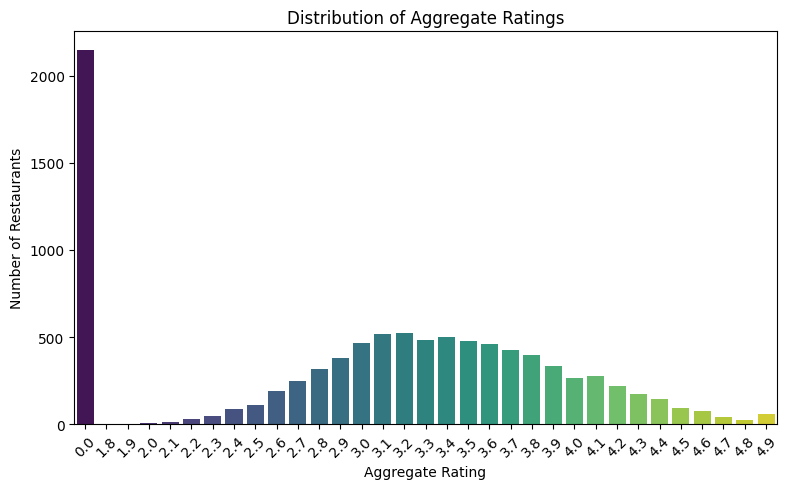


Rating Distribution:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


In [13]:
import pandas as pd

df = pd.read_csv("Dataset .csv")

# 1. Display shape of the dataset
print("Dataset shape (rows, columns):", df.shape)


# 2. Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Handle missing values in 'Cuisines' column
df['Cuisines'].fillna('Unknown', inplace=True)
print("\nMissing values after filling 'Cuisines':")
print(df.isnull().sum())


# 4. Data type conversion
# Convert Yes/No to Boolean
bool_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in bool_columns:
    df[col] = df[col].map({'Yes': True, 'No': False})


    # Optional: Convert some columns to category type for better memory usage and efficiency
category_columns = ['City', 'Country Code', 'Rating color', 'Rating text']
for col in category_columns:
    df[col] = df[col].astype('category')


    # 5. Analyze distribution of target variable 'Aggregate rating'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Aggregate rating', palette='viridis')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Check for class imbalance
rating_distribution = df['Aggregate rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_distribution)


In [16]:
#level1 task 2
# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Calculate statistics
stats = pd.DataFrame({
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Variance': numerical_df.var(),
    #'Minimum': numerical_df.min(),
    #'Maximum': numerical_df.max(),
    #'Range': numerical_df.max() - numerical_df.min(),
    #'IQR': numerical_df.quantile(0.75) - numerical_df.quantile(0.25)
})

# Print the result
print("Basic Statistical Measures for Numerical Columns:\n")
print(stats)

# --- Distribution of Categorical Variables ---
print("Unique 'Country Code' values and their counts:")
print(df['Country Code'].value_counts(), "\n")

print("Unique 'City' values and their counts:")
print(df['City'].value_counts(), "\n")

print("Unique 'Cuisines' values and their counts:")
print(df['Cuisines'].value_counts(), "\n")

# --- Top Cities with Most Restaurants ---
top_cities = df['City'].value_counts().head(10)
print("Top 10 Cities with the Most Restaurants:")
print(top_cities, "\n")

# --- Top Cuisines ---
# Some entries have multiple cuisines separated by commas, so let's split them
from collections import Counter

# Drop NaN and split cuisines
cuisine_series = df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
all_cuisines = [cuisine for sublist in cuisine_series for cuisine in sublist]
cuisine_counts = Counter(all_cuisines)

# Convert to DataFrame for easier handling
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

print("Top 10 Most Common Cuisines:")
print(cuisine_df.head(10))


Basic Statistical Measures for Numerical Columns:

                              Mean        Median  Standard Deviation  \
Restaurant ID         9.051128e+06  6.004089e+06        8.791521e+06   
Longitude             6.412657e+01  7.719196e+01        4.146706e+01   
Latitude              2.585438e+01  2.857047e+01        1.100794e+01   
Average Cost for two  1.199211e+03  4.000000e+02        1.612118e+04   
Price range           1.804837e+00  2.000000e+00        9.056088e-01   
Aggregate rating      2.666370e+00  3.200000e+00        1.516378e+00   
Votes                 1.569097e+02  3.100000e+01        4.301691e+02   

                          Variance  
Restaurant ID         7.729085e+13  
Longitude             1.719517e+03  
Latitude              1.211746e+02  
Average Cost for two  2.598925e+08  
Price range           8.201274e-01  
Aggregate rating      2.299401e+00  
Votes                 1.850455e+05  
Unique 'Country Code' values and their counts:
Country Code
1      8652
216 

In [17]:
#level1 task3
import plotly.express as px

# Filter out rows with missing latitude or longitude
df_map = df.dropna(subset=['Latitude', 'Longitude'])

# Create a scatter map
fig = px.scatter_mapbox(
    df_map,
    lat='Latitude',
    lon='Longitude',
    hover_name='Restaurant Name',
    hover_data=['City', 'Cuisines'],
    color_discrete_sequence=['red'],
    zoom=1,
    height=600
)

# Use an open-source map style
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Restaurant Locations on Map')

fig.show()


<ipython-input-24-9981fa945ebb>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




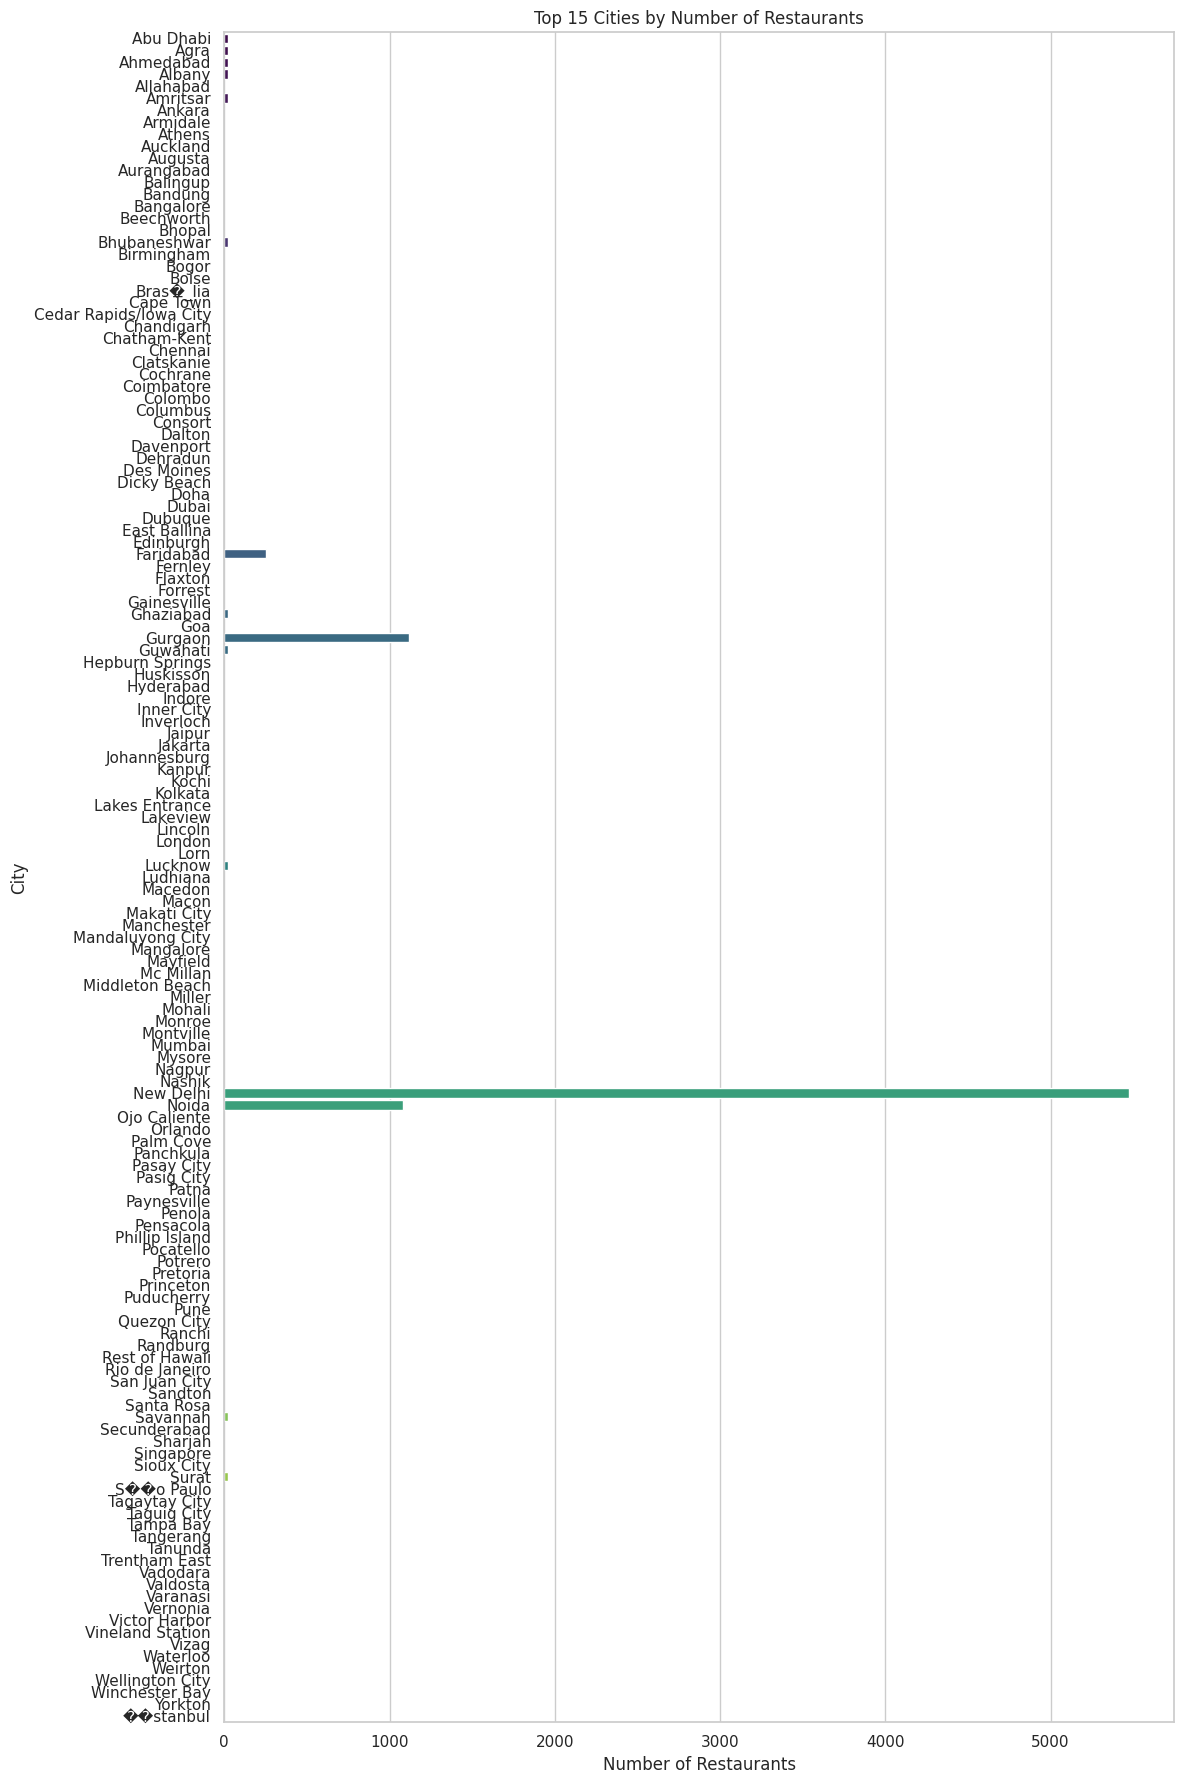

In [24]:

# Country code to country name mapping
country_map = {
    1: "India", 14: "Australia", 30: "Brazil", 37: "Canada", 94: "Indonesia",
    148: "New Zealand", 162: "Philippines", 166: "Qatar", 184: "Singapore",
    189: "South Africa", 191: "Sri Lanka", 208: "Turkey", 214: "UAE",
    215: "UK", 216: "USA"
}
df['Country'] = df['Country Code'].map(country_map)

# Set the visual style
sns.set(style="whitegrid")

# 1. Top 15 Cities by Restaurant Count
top_cities = df['City'].value_counts().nlargest(15)
plt.figure(figsize=(12, 18))#i just incresed the hight in order to get clear view of cities
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 15 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()



<ipython-input-19-df1638b57128>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




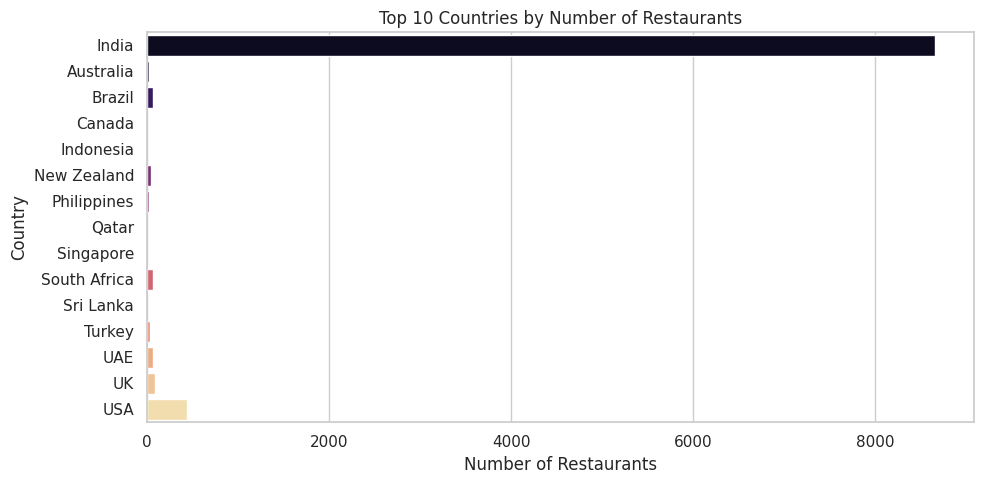

In [19]:
# 2. Top 10 Countries by Restaurant Count
top_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



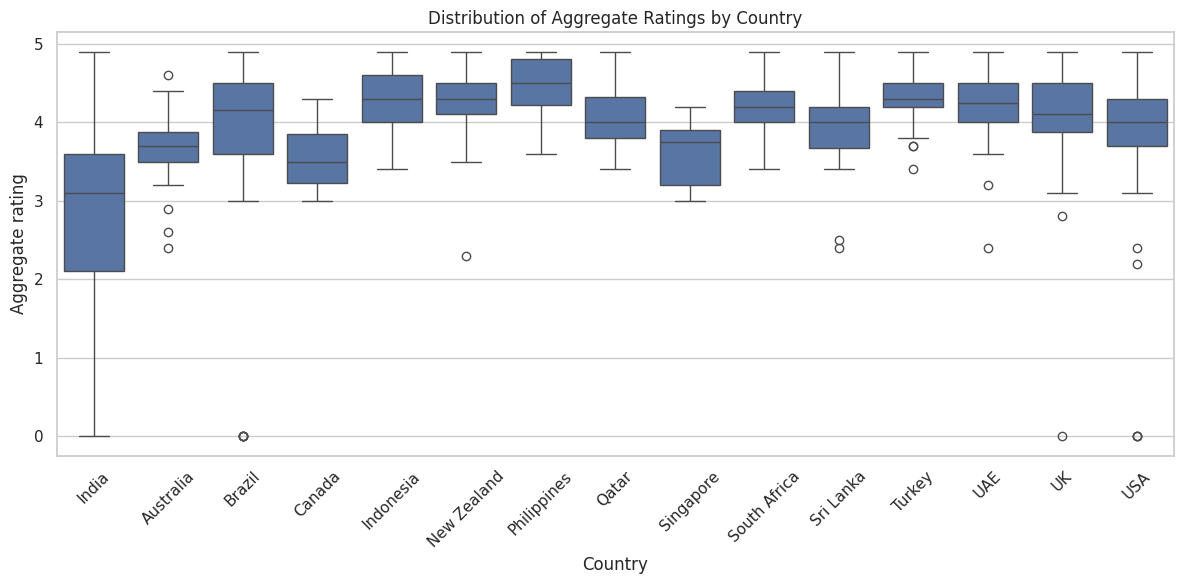

In [20]:
# 3. Boxplot: Aggregate Rating by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Aggregate rating', data=df)
plt.title("Distribution of Aggregate Ratings by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-25-5a41413da109>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-25-5a41413da109>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




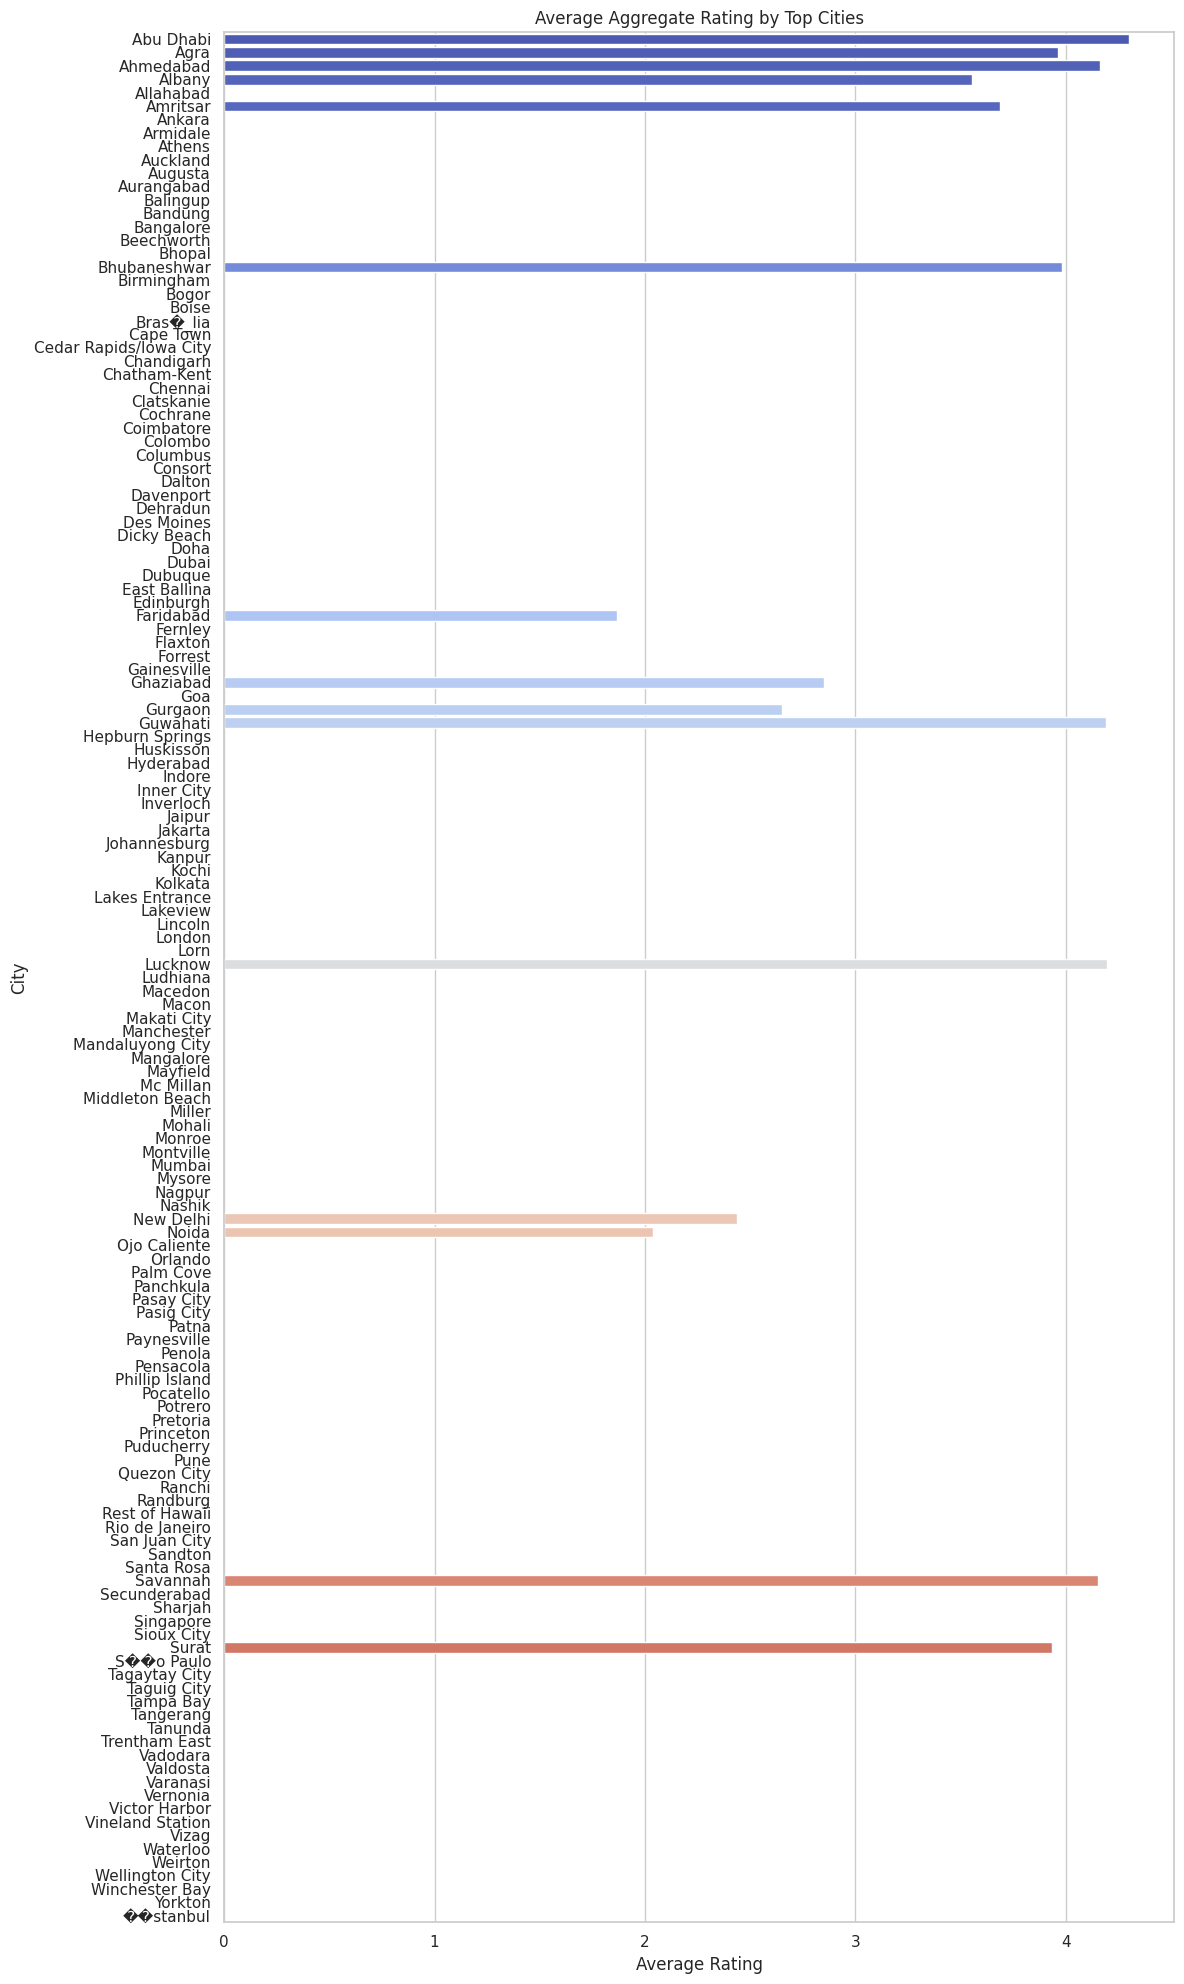

In [25]:
# 4. Average Aggregate Rating by Top Cities
top_city_names = top_cities.index.tolist()
avg_rating_by_city = (
    df[df['City'].isin(top_city_names)]
    .groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 20)) #i just incresed the hight in order to get clear view of cities
sns.barplot(x=avg_rating_by_city.values, y=avg_rating_by_city.index, palette='coolwarm')
plt.title("Average Aggregate Rating by Top Cities")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.tight_layout()
plt.show()